# 実演　×の画像認識
　昨日一から全部自分で作ったので褒めてください。（特にこれ↓↓↓）

## 準備

In [1]:
import numpy as np

x        = np.array([[-1, -1, -1, -1, -1, -1, -1, -1, -1], 
                     [-1,  1, -1, -1, -1, -1, -1,  1, -1],
                     [-1, -1,  1, -1, -1, -1,  1, -1, -1],
                     [-1, -1, -1,  1, -1,  1, -1, -1, -1],
                     [-1, -1, -1, -1,  1, -1, -1, -1, -1],
                     [-1, -1, -1,  1, -1,  1, -1, -1, -1],
                     [-1, -1,  1, -1, -1, -1,  1, -1, -1],
                     [-1,  1, -1, -1, -1, -1, -1,  1, -1],
                     [-1, -1, -1, -1, -1, -1, -1, -1, -1]], dtype=np.float32)

x_rotated = np.array([[-1, -1, -1, -1, -1, -1, -1, -1, -1],
                      [-1, -1, -1, -1, -1, -1,  1, -1, -1],
                      [-1,  1, -1, -1, -1,  1, -1, -1, -1],
                      [-1, -1,  1,  1, -1,  1, -1, -1, -1],
                      [-1, -1, -1, -1,  1, -1, -1, -1, -1],
                      [-1, -1, -1,  1, -1,  1,  1, -1, -1],
                      [-1, -1, -1,  1, -1, -1, -1,  1, -1],
                      [-1, -1,  1, -1, -1, -1, -1, -1, -1],
                      [-1, -1, -1, -1, -1, -1, -1, -1, -1]], dtype=np.float32)

x_plus    = np.array([[-1, -1, -1, -1, -1, -1, -1, -1, -1],
                      [-1, -1, -1, -1,  1, -1, -1, -1, -1],
                      [-1, -1, -1, -1,  1, -1, -1, -1, -1],
                      [-1, -1, -1, -1,  1, -1, -1, -1, -1],
                      [-1,  1,  1,  1,  1,  1,  1,  1, -1],
                      [-1, -1, -1, -1,  1, -1, -1, -1, -1],
                      [-1, -1, -1, -1,  1, -1, -1, -1, -1],
                      [-1, -1, -1, -1,  1, -1, -1, -1, -1],
                      [-1, -1, -1, -1, -1, -1, -1, -1, -1]], dtype=np.float32)

o         = np.array([[-1, -1, -1, -1, -1, -1, -1, -1, -1],
                      [-1, -1, -1,  1,  1,  1, -1, -1, -1],
                      [-1, -1,  1, -1, -1, -1,  1, -1, -1],
                      [-1,  1, -1, -1, -1, -1, -1,  1, -1],
                      [-1,  1, -1, -1, -1, -1, -1,  1, -1],
                      [-1,  1, -1, -1, -1, -1, -1,  1, -1],
                      [-1, -1,  1, -1, -1, -1,  1, -1, -1],
                      [-1, -1, -1,  1,  1,  1, -1, -1, -1],
                      [-1, -1, -1, -1, -1, -1, -1, -1, -1]], dtype=np.float32)

diamond   = np.array([[-1, -1, -1, -1, -1, -1, -1, -1, -1],
                      [-1, -1, -1, -1,  1, -1, -1, -1, -1],
                      [-1, -1, -1,  1, -1,  1, -1, -1, -1],
                      [-1, -1,  1, -1, -1, -1,  1, -1, -1],
                      [-1,  1, -1, -1, -1, -1, -1,  1, -1],
                      [-1, -1,  1, -1, -1, -1,  1, -1, -1],
                      [-1, -1, -1,  1, -1,  1, -1, -1, -1],
                      [-1, -1, -1, -1,  1, -1, -1, -1, -1],
                      [-1, -1, -1, -1, -1, -1, -1, -1, -1]], dtype=np.float32)

imgs  = [x, x_rotated, x_plus, o, diamond]
names = ["x        ",
         "x_rotated",
         "x_plus   ",
         "o        ",
         "diamond  "] #可視化用に使う

In [2]:
# 描画する関数imshow(x_or_list)を定義
# x_or_listには画像1枚を指定してもいいし，画像のリストを指定してもいい。便利！

import matplotlib.pyplot as plt


def imshow(x_or_list):
    # すべてリストに格納
    ls = []
    if type(x_or_list) == np.ndarray:
        ls.append(x_or_list)
    elif type(x_or_list) == list:
        ls = x_or_list


    total = len(ls)
    fig = plt.figure(figsize=(3 * total + 0.5 * (total - 1), 6))
    for i, x in enumerate(ls):
        size = x.shape[0]
        ax = fig.add_subplot(1, total, i + 1)
        ax.imshow(x, vmin=0, vmax=1, cmap="gray")
        ax.set_xticks(np.arange(-0.5, size, 1))
        ax.set_yticks(np.arange(-0.5, size, 1))
        ax.tick_params(labelbottom=False,
                       labelleft=False,
                       labelright=False,
                       labeltop=False,
                       bottom=False,
                       left=False,
                       right=False,
                       top=False)
        ax.grid(linewidth=2)

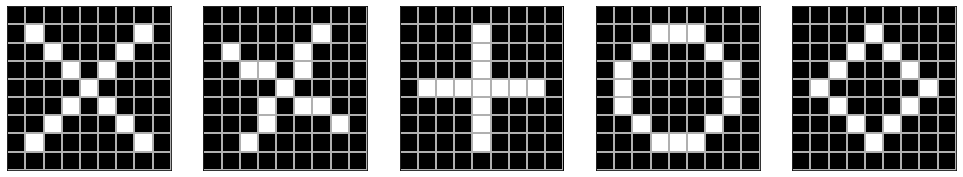

In [3]:
# 表示してみる
imshow([x, x_rotated, x_plus, o, diamond])

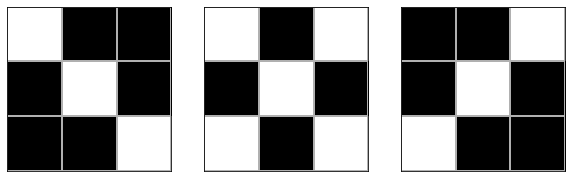

In [4]:
# フィルターを作成（※実際にはCNNはここの重みを学習する）

filter1 = np.array([[ 1, -1, -1],
                    [-1,  1, -1],
                    [-1, -1,  1]])
filter2 = np.array([[ 1, -1,  1],
                    [-1,  1, -1],
                    [ 1, -1,  1]])
filter3 = np.array([[-1, -1,  1],
                    [-1,  1, -1],
                    [ 1, -1, -1]])

imshow([filter1, filter2, filter3]);

# 実際使うときは正規化する(9で割る)
filter1 = filter1.astype(np.float32) / 9
filter2 = filter2.astype(np.float32) / 9
filter3 = filter3.astype(np.float32) / 9
filter_list = [filter1, filter2, filter3]

## 畳み込み

In [5]:
# np.arrayに作用できるReLU関数を用意

def relu(img):
    return np.vectorize(lambda x: max(x, 0.))(img)

In [6]:
# sameパディングで畳み込みを行いReLUを通す関数convを定義

def conv(img, filter):
    size = img.shape[0]
    filter_size = filter.shape[0]
    _img = img.copy()
    
    # フィルターサイズが3×3なので，幅1でゼロパディング
    _img = np.pad(_img, pad_width=((1, 1), (1, 1)), mode="constant")
    
    # 結果を格納する配列
    res = np.zeros_like(img, dtype=np.float32)
    
    # 畳み込み演算    
    for y in range(0, size):
        for x in range(0, size):
            res[y, x] =(_img[y : y + 3, x : x + 3] * filter).sum()

    return relu(res)

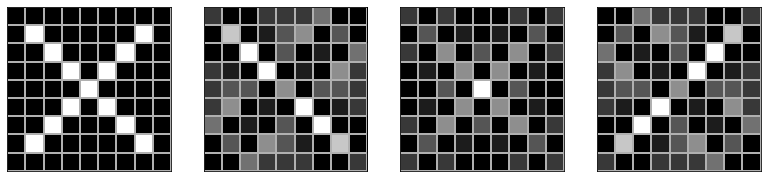

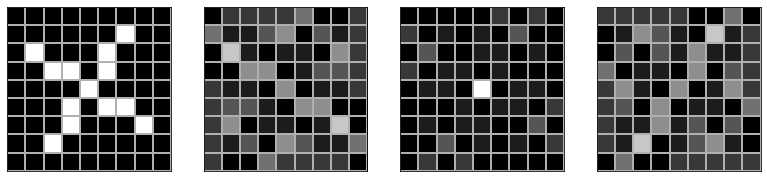

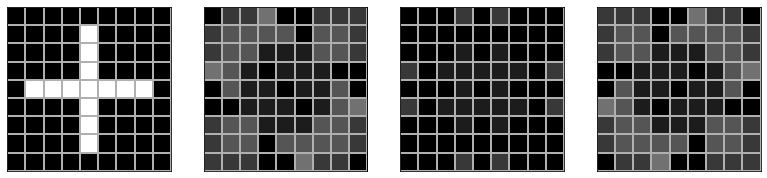

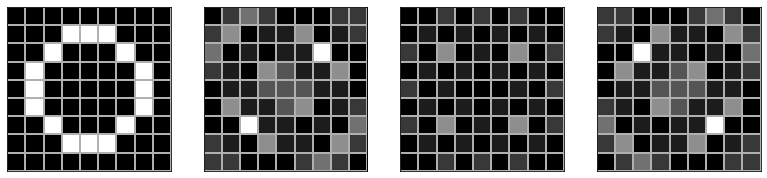

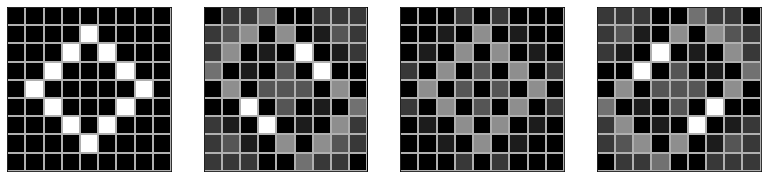

In [7]:
# それぞれの画像を3枚のフィルターで畳み込み

for img in imgs:
    ls =[img]
    for filter in filter_list:
        ls.append(conv(img, filter))
    imshow(ls)

ちなみに，わざわざ実装しなくても下のようにOpenCVのfilter2D関数でできる（※境界付近が微妙に異なるのは，恐らくゼロパディングをしてくれないから？じゃあ一体何してるんだ…？）

In [8]:
try:
    import cv1

    ls = [diamond]

    for filter in filter_list:
        ls.append(relu(cv2.filter2D(src=diamond, ddepth=-1, kernel=filter)))
    
    imshow(ls)

except:
    print("Error : 興味があればcv2をインストールしてください！必ずしも必要ではありません。")

Error : 興味があればcv2をインストールしてください！必ずしも必要ではありません。


## プーリング

In [9]:
# Maxプーリング

def pool(img, filter_size=3):
    size = img.shape[0]
    res_size = size // filter_size
    
    res = np.zeros(shape=(res_size, res_size))
    
    for y in range(size // filter_size):
        for x in range(size // filter_size):
            res[y, x] = img[y * filter_size : (y + 1) * filter_size, x * filter_size : (x + 1) * filter_size].max()
    return res

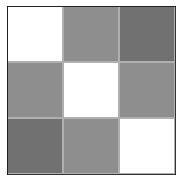

In [10]:
# 確認

imshow([pool(conv(x, filter1))])

## 実験１（色々な形で比べる）

In [11]:
# 一連の流れをcnn関数としてまとめる

def cnn(img, filter_list):
    return [pool(conv(img, filter)) for filter in filter_list]

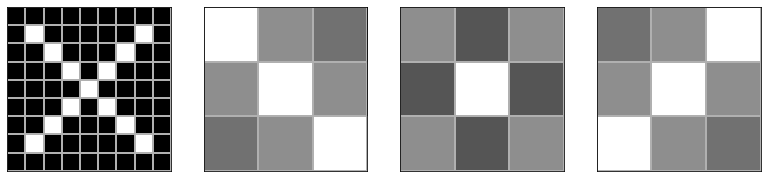

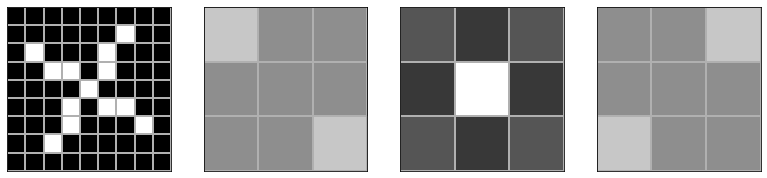

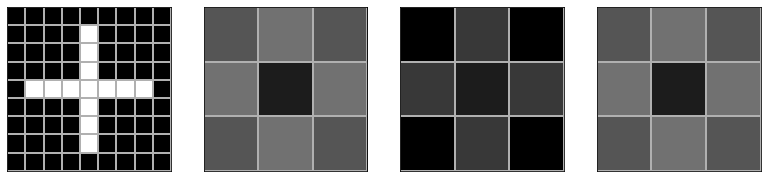

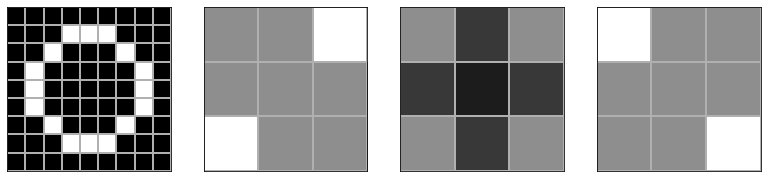

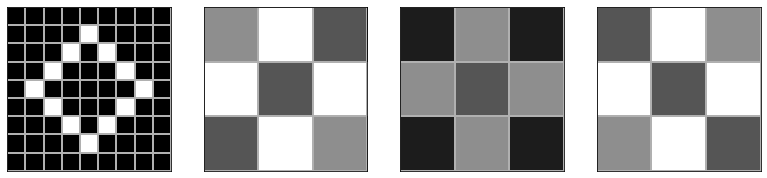

In [12]:
# それぞれの画像にcnnを適用

for img in imgs:
    imshow([img] + cnn(img, filter_list))

In [13]:
# それぞれの結果の要素(27個)の和

import pandas as pd

pd.DataFrame([[res.sum() for res in cnn(img, filter_list)] for img in imgs],
             index=names,
             columns=["filter1", "filter2", "filter3"])

,filter1,filter2,filter3
x,6.111111,4.555556,6.111111
x_rotated,5.444445,3.222222,5.444445
x_plus,3.222222,1.000000,3.222222
o,5.888889,3.222222,5.888889
diamond,6.111111,3.000000,6.111111


In [14]:
# それぞれの結果の差の二乗平均のクロス集計

try:
    from sklearn.metrics import mean_squared_error as mse
    mses = [
                [mse(np.array(cnn(img1, filter_list)).flatten(),
                     np.array(cnn(img2, filter_list)).flatten())
                 for img2 in imgs]
            for img1 in imgs]
except: # iPadにsklearnを入れられないので発表ではこっちを使います
    mses = [[((np.array(cnn(img1, filter_list)).flatten() \
             - np.array(cnn(img2, filter_list)).flatten())**2).mean() for img2 in imgs] for img1 in imgs]
    
pd.DataFrame(mses, index=names, columns=names)

,x,x_rotated,x_plus,o,diamond
x,0.000000,0.032922,0.206676,0.120713,0.175583
x_rotated,0.032922,0.000000,0.100594,0.073160,0.117055
x_plus,0.206676,0.100594,0.000000,0.137174,0.122542
o,0.120713,0.073160,0.137174,0.000000,0.175583
diamond,0.175583,0.117055,0.122542,0.175583,0.000000


## 実験２（プーリングを平均プーリングに変えてみる）

In [15]:
# Averageプーリング

def pool(img, filter_size=3):
    size = img.shape[0]
    res_size = size // filter_size
    
    res = np.zeros(shape=(res_size, res_size))
    
    for y in range(size // filter_size):
        for x in range(size // filter_size):
            res[y, x] = img[y * filter_size : (y + 1) * filter_size, x * filter_size : (x + 1) * filter_size].mean()
    return res

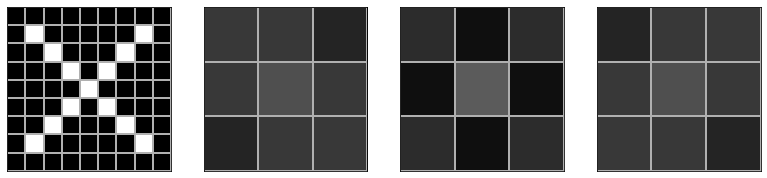

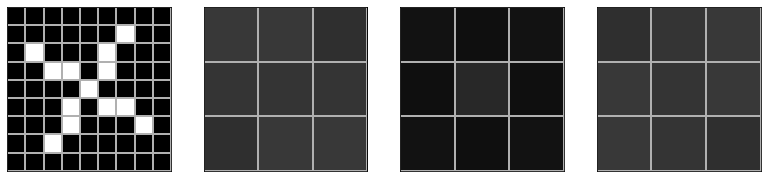

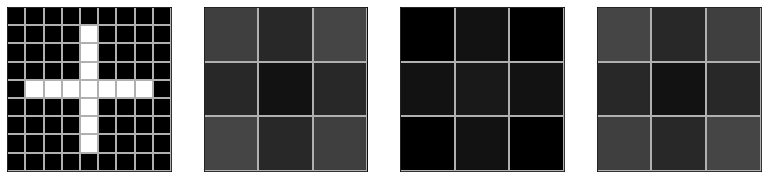

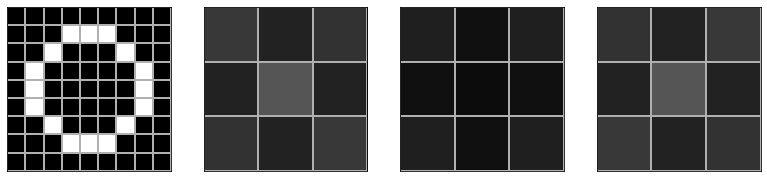

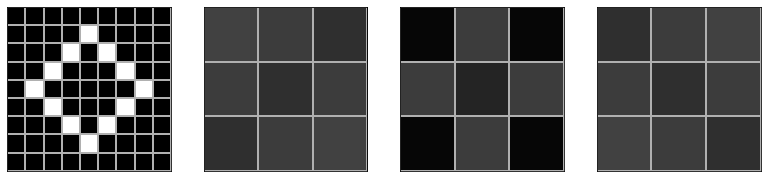

In [16]:
# それぞれの画像にcnnを適用

for img in imgs:
    imshow([img] + cnn(img, filter_list))

In [17]:
# それぞれの結果の要素(27個)の和

import pandas as pd

pd.DataFrame([[res.sum() for res in cnn(img, filter_list)] for img in imgs],
             index=names,
             columns=["filter1", "filter2", "filter3"])

,filter1,filter2,filter3
x,1.938272,1.296296,1.938272
x_rotated,1.888889,0.703704,1.888889
x_plus,1.753086,0.395062,1.753086
o,1.716049,0.790124,1.716049
diamond,2.012346,1.185185,2.012346


In [18]:
# それぞれの結果の差の二乗平均のクロス集計

try:
    from sklearn.metrics import mean_squared_error as mse
    mses = [
                [mse(np.array(cnn(img1, filter_list)).flatten(),
                     np.array(cnn(img2, filter_list)).flatten())
                 for img2 in imgs]
            for img1 in imgs]
except: # iPadにsklearnを入れられないので発表ではこっちを使います
    mses = [[((np.array(cnn(img1, filter_list)).flatten() \
             - np.array(cnn(img2, filter_list)).flatten())**2).mean() for img2 in imgs] for img1 in imgs]
    
pd.DataFrame(mses, index=names, columns=names)

,x,x_rotated,x_plus,o,diamond
x,0.000000,0.003839,0.014491,0.006509,0.010889
x_rotated,0.003839,0.000000,0.004465,0.003889,0.005154
x_plus,0.014491,0.004465,0.000000,0.008434,0.007666
o,0.006509,0.003889,0.008434,0.000000,0.010974
diamond,0.010889,0.005154,0.007666,0.010974,0.000000


## 実験３（ズレに強いことを確かめる）

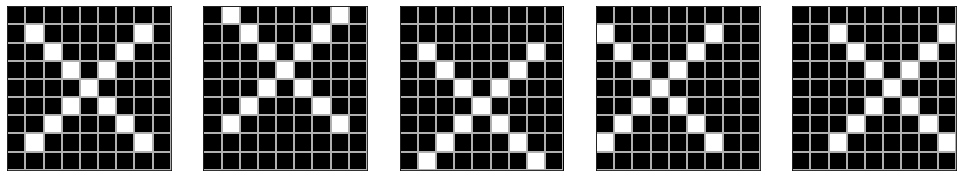

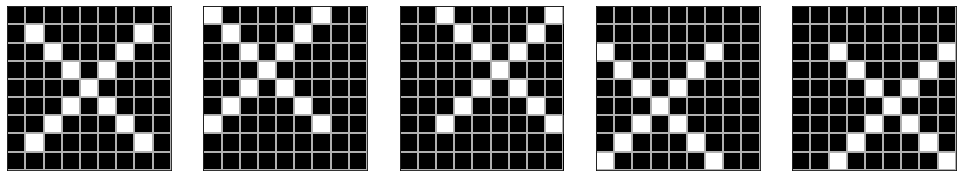

In [19]:
x_up    = np.pad(x[1:,  :], ((0, 1), (0, 0)), mode="constant")
x_down  = np.pad(x[:-1, :], ((1, 0), (0, 0)), mode="constant")
x_left  = np.pad(x[:,  1:], ((0, 0), (0, 1)), mode="constant")
x_right = np.pad(x[:, :-1], ((0, 0), (1, 0)), mode="constant")

x_upleft    = np.pad(x[ 1:,  1:], ((0, 1), (0, 1)), mode="constant")
x_upright   = np.pad(x[ 1:, :-1], ((0, 1), (1, 0)), mode="constant")
x_downleft  = np.pad(x[:-1,  1:], ((1, 0), (0, 1)), mode="constant")
x_downright = np.pad(x[:-1, :-1], ((1, 0), (1, 0)), mode="constant")

# コードを使いまわすために，上で使った変数を更新します。すみません。
imgs  = [x, x_up, x_down, x_left, x_right, x, x_upleft, x_upright, x_downleft, x_downright]
names = ["x          ",
         "x_up       ",
         "x_down     ",
         "x_left     ",
         "x_right    ",
         "x          ",
         "x_upleft   ",
         "x_upright  ",
         "x_downleft ",
         "x_downright"]

imshow(imgs[:5])
imshow(imgs[5:])

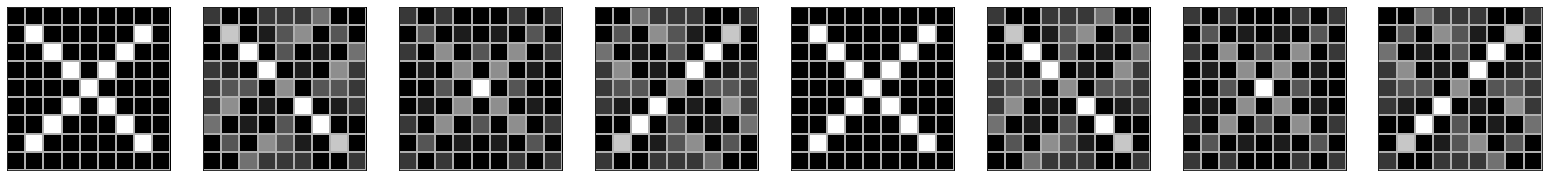

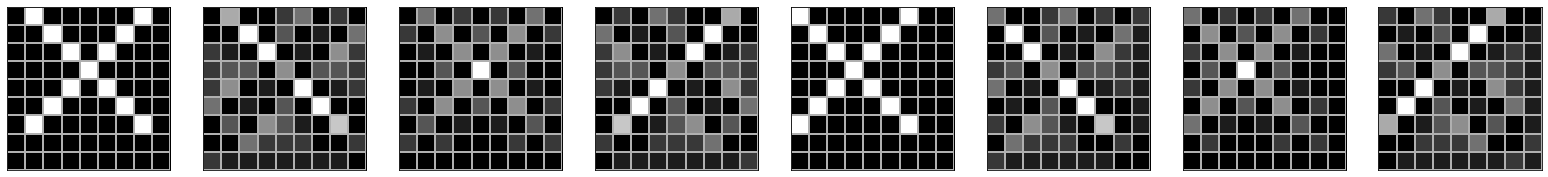

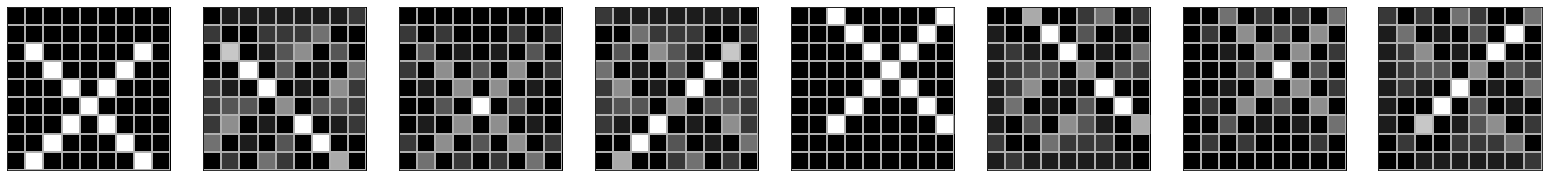

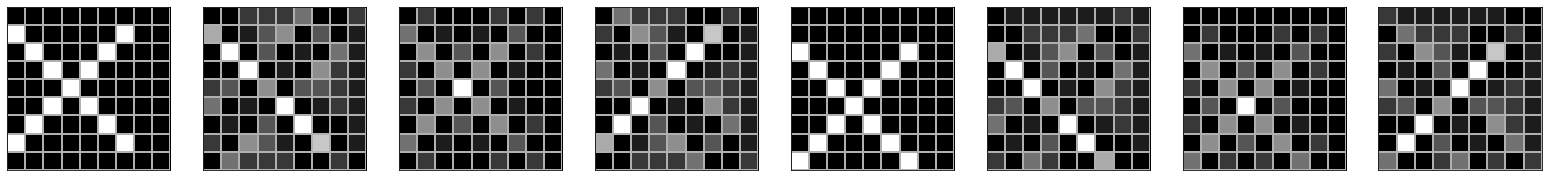

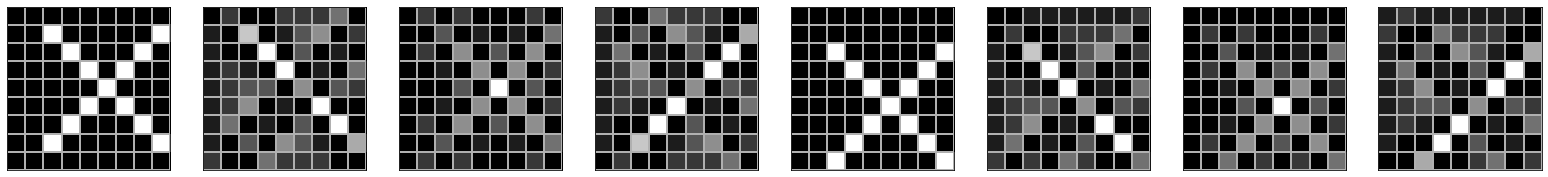

In [20]:
# それぞれの画像を3枚のフィルターで畳み込み

for img_tuple in zip(imgs[:5], imgs[5:]):
    ls = []
    for img in img_tuple:
        ls.append(img)
        for filter in filter_list:
            ls.append(conv(img, filter))
    imshow(ls)

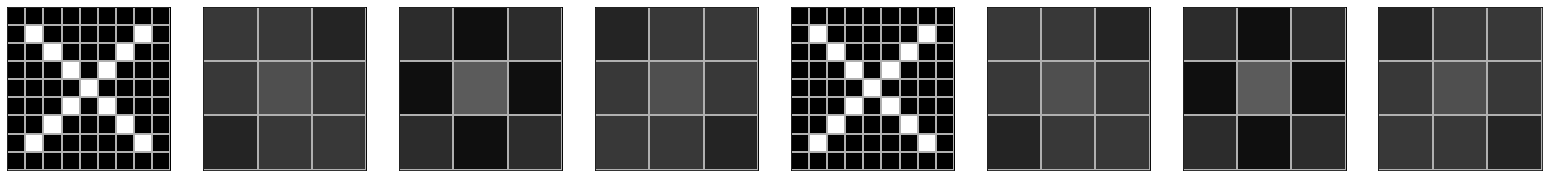

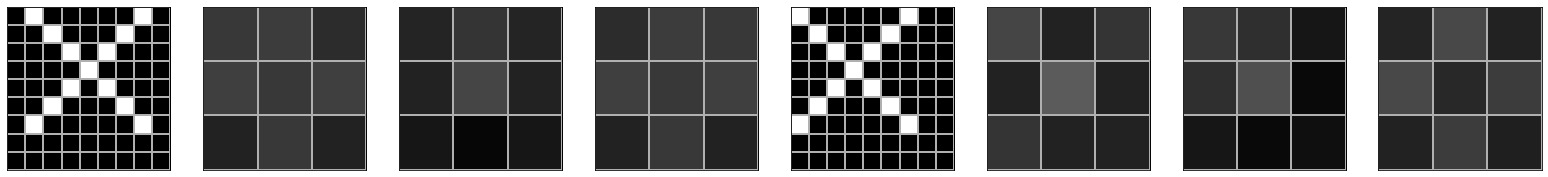

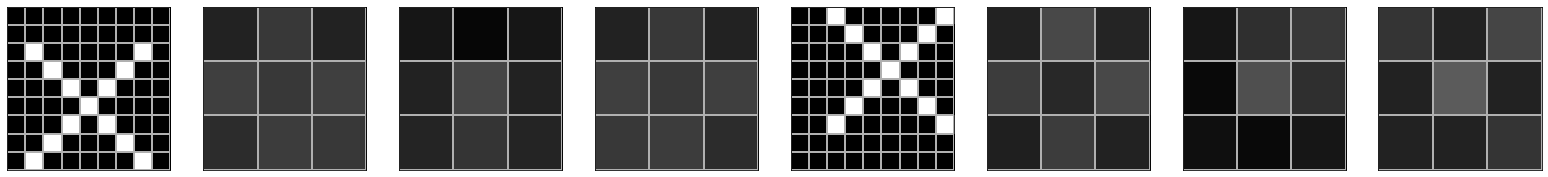

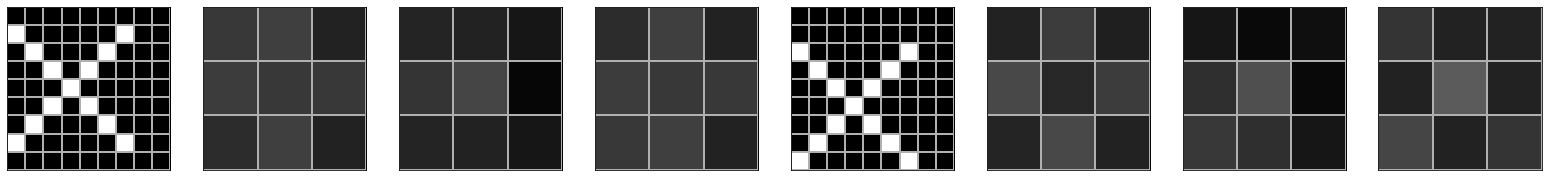

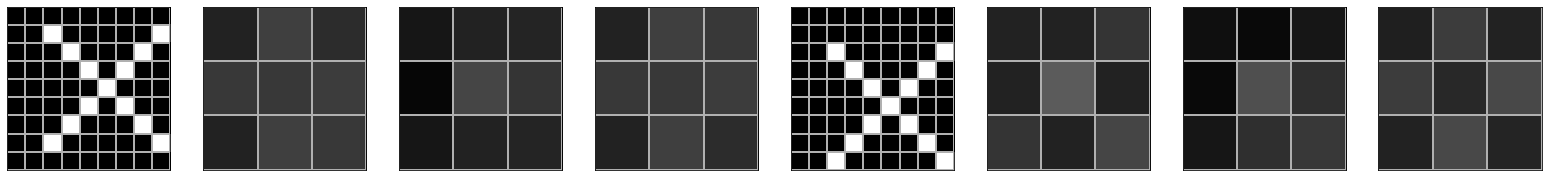

In [21]:
# それぞれの画像にcnnを適用

for img_tuple in zip(imgs[:5], imgs[5:]):
    ls = []
    for img in img_tuple:
        ls.append(img)
        ls += cnn(img, filter_list)
    imshow(ls)

In [22]:
# それぞれの結果の要素(27個)の和

pd.DataFrame([[res.sum() for res in cnn(img, filter_list)] for img in imgs[:5] + imgs[6:]],
             index=names[:5] + names[6:],
             columns=["filter1", "filter2", "filter3"])

,filter1,filter2,filter3
x,1.938272,1.296296,1.938272
x_up,1.839506,1.246914,1.839506
x_down,1.839506,1.246914,1.839506
x_left,1.839506,1.246914,1.839506
x_right,1.839506,1.246914,1.839506
x_upleft,1.728395,1.209877,1.740741
x_upright,1.740741,1.209877,1.728395
x_downleft,1.740741,1.209877,1.728395
x_downright,1.728395,1.209877,1.740741


In [23]:
# それぞれの結果の差の二乗平均のクロス集計

try:
    mses = [
                [mse(np.array(cnn(img1, filter_list)).flatten(),
                     np.array(cnn(img2, filter_list)).flatten())
                 for img2 in imgs[:5] + imgs[6:]]
            for img1 in imgs[:5] + imgs[6:]]
except: # iPadにsklearnを入れられないので発表ではこっちを使います
    mses = [
                [((np.array(cnn(img1, filter_list)).flatten() \
                 - np.array(cnn(img2, filter_list)).flatten())**2) \
                 .mean() for img2 in imgs[:5] + imgs[6:]]
            for img1 in imgs[:5] + imgs[6:]]
    
pd.DataFrame(mses, index=names[:5]+names[6:], columns=names[:5]+names[6:])

,x,x_up,x_down,x_left,x_right,x_upleft,x_upright,x_downleft,x_downright
x,0.000000,0.003410,0.003410,0.003410,0.003410,0.005893,0.005893,0.005893,0.005893
x_up,0.003410,0.000000,0.004437,0.002371,0.002371,0.004076,0.004076,0.007824,0.007824
x_down,0.003410,0.004437,0.000000,0.002371,0.002371,0.007824,0.007824,0.004076,0.004076
x_left,0.003410,0.002371,0.002371,0.000000,0.004437,0.004076,0.007824,0.004076,0.007824
x_right,0.003410,0.002371,0.002371,0.004437,0.000000,0.007824,0.004076,0.007824,0.004076
x_upleft,0.005893,0.004076,0.007824,0.004076,0.007824,0.000000,0.012826,0.012826,0.006932
x_upright,0.005893,0.004076,0.007824,0.007824,0.004076,0.012826,0.000000,0.006932,0.012826
x_downleft,0.005893,0.007824,0.004076,0.004076,0.007824,0.012826,0.006932,0.000000,0.012826
x_downright,0.005893,0.007824,0.004076,0.007824,0.004076,0.006932,0.012826,0.012826,0.000000


**参考サイト**

・畳み込みニューラルネットワークの仕組み(https://postd.cc/how-do-convolutional-neural-networks-work/)